In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


4000002 Phylum 6570.0
4000002 Family 2603.0
4000002 Genus 1557.0
2759 Phylum 10032.0


/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2759 Family 13.0


/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


2759 Genus 2.0
4137846 Phylum 13641.0
4137846 Family 1142.0
4137846 Genus 723.0
10239 Phylum 157.0
10239 Family 26.0


/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/livinit/miniconda3/envs/tutorial/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

10239 Genus 17.0


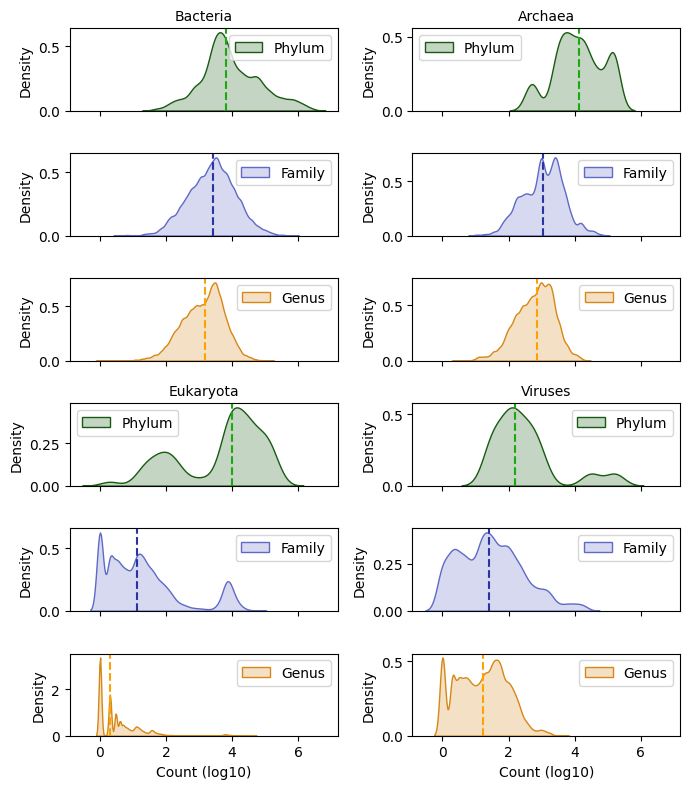

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the datasets for genus, family, and phylum
phylum_df = pd.read_csv(
    "../../28_cnt_per_rank/afesm30_repseq_foldseek_clu_nonsingleton-phylumId_phylumName_superkingdom_superkingdomName_count.tsv",
    header=None, 
    names="genus_genusName_superkingdom_superkingdomName_count".split("_"),
    delimiter="\t"
)
family_df = pd.read_csv(
    "../../28_cnt_per_rank/afesm30_repseq_foldseek_clu_nonsingleton-familyId_familyName_superkingdom_superkingdomName_count.tsv",
    header=None,
    names="genus_genusName_superkingdom_superkingdomName_count".split("_"),
    delimiter="\t"
)
genus_df = pd.read_csv(
    "../../15_n_genus/afesm30_repseq_foldseek_clu_nonsingleton-genus_genusName_superkingdom_superkingdomName_count.tsv",
    header=None,
    names="genus_genusName_superkingdom_superkingdomName_count".split("_"),
    delimiter="\t"
)

# Combine all dataframes with an additional rank column
phylum_df['rank'] = 'Phylum'
family_df['rank'] = 'Family'
genus_df['rank'] = 'Genus'
combined_df = pd.concat([phylum_df, family_df, genus_df])
# print(combined_df.head())

# Function to create KDE plots for a given rank
def create_kde_by_rank(df, superkingdom_id, rank, ax, rank_colors, rank_line_colors):
    df_superkingdom_rank = df[(df['superkingdom'] == superkingdom_id) & (df['rank'] == rank)]
    if df_superkingdom_rank.empty:
        return

    log_data = np.log10(df_superkingdom_rank['count'].sort_values())
    # print(log_data.head())
    # print(df_superkingdom_rank['count'].sort_values().head())
    
    # Plot the KDE
    sns.kdeplot(log_data, ax=ax, fill=True, bw_adjust=0.5, color=rank_colors[rank], label=rank)
    
    ax.legend()
    # Add a vertical line for the mean
    mean_value = np.median(df_superkingdom_rank['count'].sort_values())
    # print(superkingdom_id, rank, mean_value, 10**mean_value, np.mean(df_superkingdom_rank['count'].sort_values()))
    print(superkingdom_id, rank, mean_value)
    ax.axvline(np.log10(mean_value), color=rank_line_colors[rank], linestyle='--', label=f"{rank} Mean")
    
    # ax.set_ylabel('Density')
    # ax.set_xlabel('Count (log10)')
    # if rank == "Genus":

# Define superkingdom mapping
superkingdoms = {
    4000002: "Bacteria",
    2759: "Eukaryota",
    4137846: "Archaea",
    10239: "Viruses"
}

# Rank colors and line colors
rank_colors = {'Phylum': '#175B11', 'Family': '#5F69C6', 'Genus': '#D68717'}
rank_line_colors = {'Phylum': '#1DA811', 'Family': '#2834A3', 'Genus': '#FFA100'}

# Create the plot with 6x2 subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(7, 8), sharex=True, )

# Iterate over superkingdoms and populate subplots
for col, (superkingdom_id, superkingdom_name) in enumerate(superkingdoms.items()):
    for row_offset, rank in enumerate(['Phylum', 'Family', 'Genus']):
        ax = axes[row_offset + 3 * (col % 2), col // 2]  # Calculate the appropriate subplot
        
        create_kde_by_rank(combined_df, superkingdom_id, rank, ax, rank_colors, rank_line_colors)
        ax.set_title(f"{superkingdom_name}", fontsize=10) if rank == 'Phylum' else None
        ax.set_xlabel('Count (log10)')
        # ax.set_xlabel('Count (log10)' if rank == 'Genus' else '')

    # Add a shared title for the superkingdom cluster (spanning three rows)
    # fig.text(
    #     x=0.5 if col % 2 == 0 else 1.05, 
    #     y=1 - (col // 2) * 0.5,  # Adjust for row spacing
    #     s=superkingdom_name, 
    #     ha='center', va='center', fontsize=14, fontweight='bold', rotation='horizontal'
    # )

# Save and display the plot
plt.tight_layout()
# plt.savefig('output/superkingdom_clustered_kde.svg')
plt.show()
